## Import Libraries

In [2]:
# import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category= UserWarning)
%matplotlib inline

## Load the dataset
**note: we are going to call the dataset "health"**

In [3]:
health = pd.read_csv(r"C:\Users\USER\Downloads\archive (18)\healthcare-dataset-stroke-data.csv")
health

health.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Get familiar with the dataset


In [4]:
# Check the data types
health.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
# Check the number of rows and columns
health.shape

(5110, 12)

In [6]:
mean_gender = health['gender'].value_counts().mean()


In [7]:
health.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# Check the summary statistics
health.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
health.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
# remove all duplicated values

health.duplicated().sum()

0

## Clean the Data 

### There are two options for handling missing values in the dataset:

**1. Fill missing values in the 'bmi' column with the mean value.**

**2. Drop all rows with any missing values entirely**

### I will be working with the dataset where all rows with null values have been dropped, and I will refer to this new dataset as 'health_drop'

In [11]:
# To avoid any mix-up, I will re-import the dataset and drop all rows with missing values
health_drop = pd.read_csv(r"C:\Users\USER\Downloads\archive (18)\healthcare-dataset-stroke-data.csv")
health_drop.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
health_drop.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [13]:
# Drop all missing values 
health_drop = health_drop.dropna()
health_drop 
health_drop.isnull().sum()
health_drop.shape


(4909, 12)

In [14]:
# remove all duplicated values

health_drop.duplicated().sum()

0

In [15]:
# Convert 'hypertension' column to "Yes" for 1 and "No" for 0
health_drop['hypertension'] = health_drop['hypertension'].map({1: 'Yes', 0: 'No'})
health_drop.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,No,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,No,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Yes,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,No,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [16]:
# convert 'age' from float to integer
health_drop['age'] = health_drop['age'].astype(int)
health_drop['age'].dtype


dtype('int32')

In [17]:
health_drop.dtypes

id                     int64
gender                object
age                    int32
hypertension          object
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Data Exploration(EDA)

In [18]:
# how many patient have stroke?  ans = 209 
stroke_count = health_drop['stroke'].value_counts()
stroke_count

stroke
0    4700
1     209
Name: count, dtype: int64

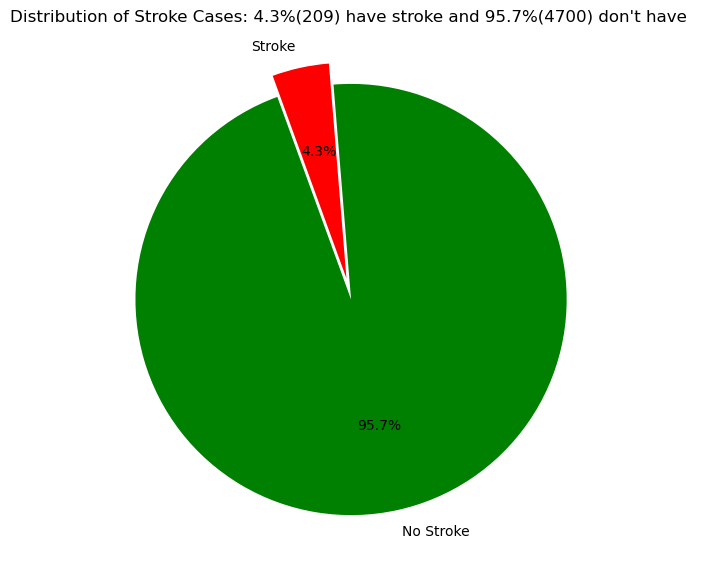

In [19]:
# Data for the pie chart
stroke_count = [4700, 209]
labels = ['No Stroke', 'Stroke']
colors = ['green', 'red'] 
plt.figure(figsize=(7, 7))
plt.pie(stroke_count, labels=labels, autopct='%1.1f%%', startangle=110, colors=colors, explode=[0, 0.1])
plt.title("Distribution of Stroke Cases: 4.3%(209) have stroke and 95.7%(4700) don't have ")
plt.show();

In [20]:
health_drop.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,No,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80,No,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,No,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,Yes,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81,No,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [21]:
# how many patient have stroke?  ans = 209 
stroke_count = health_drop['stroke'].value_counts()
stroke_count


stroke
0    4700
1     209
Name: count, dtype: int64

## Note: In this analysis, red represents cases with stroke, while green represents cases without stroke

#### <u>Question 1: What's the relationship between marriage and stroke?</u>
**1. By examining the proportion of stroke cases by marital status, we observe an increase in the stroke rate among individuals who have been married at least once**

**2. A direct count of stroke cases also shows a similar trend, but it may not be as accurate, given that the dataset contains a larger number of married people.**

In [22]:
# count the number of people who are either married or unmarried
health_drop['ever_married'].value_counts()

ever_married
Yes    3204
No     1705
Name: count, dtype: int64

In [23]:
# Since there are more married people in the dataset, we will calculate the stroke rate based on each category of marriage.
ever_married_stroke_rate = health_drop.groupby('ever_married')['stroke'].mean()
ever_married_stroke_rate

ever_married
No     0.013490
Yes    0.058052
Name: stroke, dtype: float64

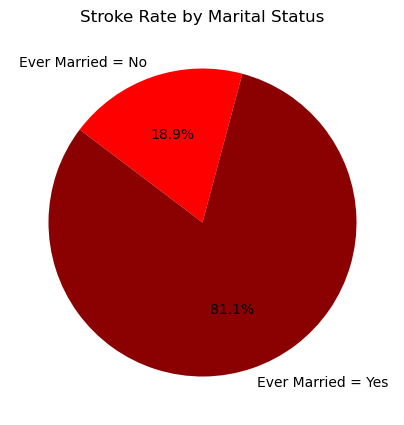

In [24]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(ever_married_stroke_rate, labels= ['Ever Married = No', 'Ever Married = Yes'], 
        autopct='%1.1f%%', startangle=75, colors = ['#FF0000','#8B0000'], explode=[0, 0.0])
plt.title('Stroke Rate by Marital Status')
plt.show();

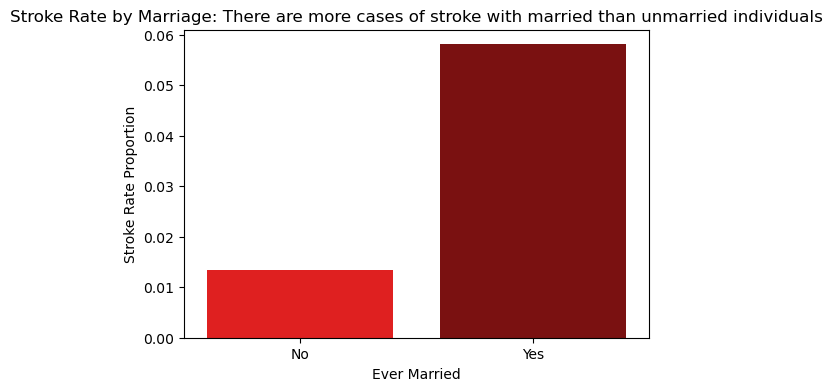

In [25]:
#Relationship between Ever married and stroke 
plt.figure(figsize=(6, 4))
sns.barplot(x=ever_married_stroke_rate.index,y=ever_married_stroke_rate.values, palette = ['#FF0000','#8B0000'])
plt.title('Stroke Rate by Marriage: There are more cases of stroke with married than unmarried individuals')
plt.xlabel('Ever Married')
plt.ylabel('Stroke Rate Proportion')
plt.show()

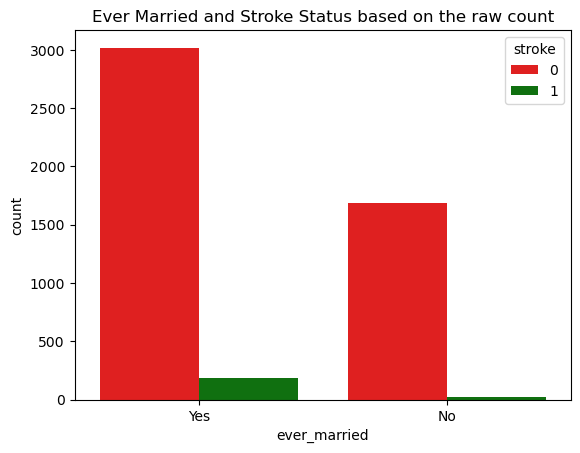

In [26]:
# A direct count of stroke cases also shows a similar trend, but it may not be as accurate
#given that the dataset contains a larger number of married people. 
sns.countplot(data= health_drop, x='ever_married', palette=['red', 'green'], hue='stroke')
plt.title('Ever Married and Stroke Status based on the raw count')
plt.show();

#### <u>Question 2: What's the relationship between gender and stroke?</u>
**1. By examining the proportion of stroke cases by gender, we observe an increase in the stroke rate in MALE than in FEMALE**

**2. A direct count of stroke cases dont show a similar trend because the dataset contains a larger number of FEMALE than MALE.**

In [27]:
# count the number of stroke cases for male and female
health_drop['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [28]:
# Since there are more female individual in the dataset, we will calculate the stroke rate based on gender. 
gender_stroke_rate = health_drop.groupby('gender')['stroke'].mean()
gender_stroke_rate

gender
Female    0.041422
Male      0.044257
Other     0.000000
Name: stroke, dtype: float64

In [29]:
stroke_count_by_gender = gender_stroke_rate *health_drop['gender'].value_counts()
stroke_count_by_gender 

gender
Female    120.0
Male       89.0
Other       0.0
dtype: float64

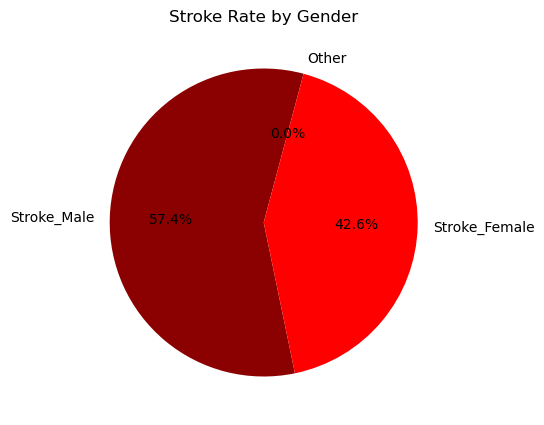

In [30]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(stroke_count_by_gender,labels= ['Stroke_Male','Stroke_Female','Other'], 
        autopct='%1.1f%%', startangle=75, colors = ['#8B0000','#FF0000','#FFC0C0'], explode=[0,0.0,0.0])
plt.title('Stroke Rate by Gender')
plt.show();

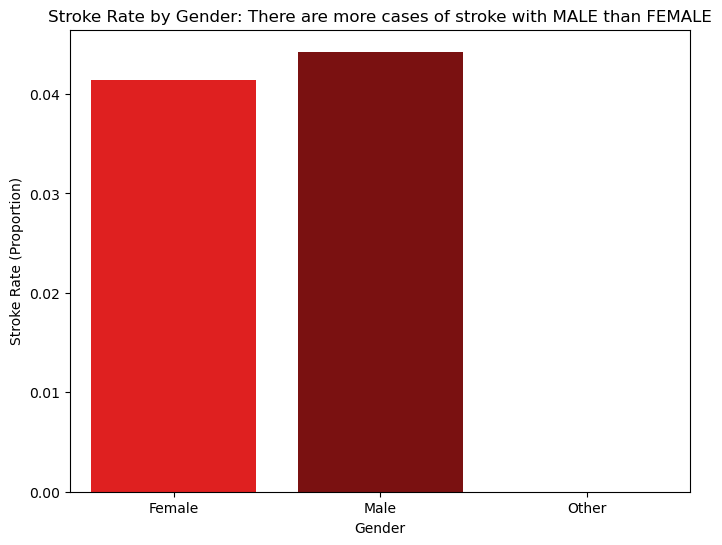

In [31]:
# Relationship between gender and stroke 
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_stroke_rate.index,y=gender_stroke_rate.values,palette = ['#FF0000','#8B0000'])
plt.title('Stroke Rate by Gender: There are more cases of stroke with MALE than FEMALE')
plt.xlabel('Gender')
plt.ylabel('Stroke Rate (Proportion)')
plt.show()

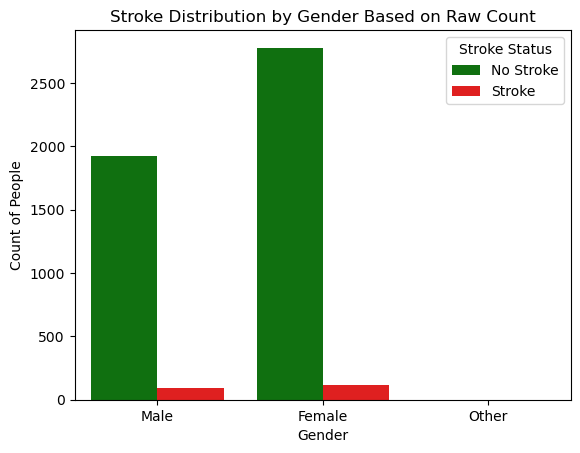

In [32]:
# A direct count of stroke cases also shows a similar trend, but it may not be as accurate
#given that the dataset contains a larger number of married people.
sns.countplot(data = health_drop, x='gender', hue='stroke', palette=['green', 'red'])
plt.title('Stroke Distribution by Gender Based on Raw Count')
plt.xlabel('Gender')
plt.ylabel('Count of People')
plt.legend(title='Stroke Status', labels=['No Stroke', 'Stroke'])
plt.show()

### <u>Question 3: Is age a risk factor for stroke?</u>

**Yes, Stroke cases are observed starting from age 40 and are most common among patients over 75 years old**

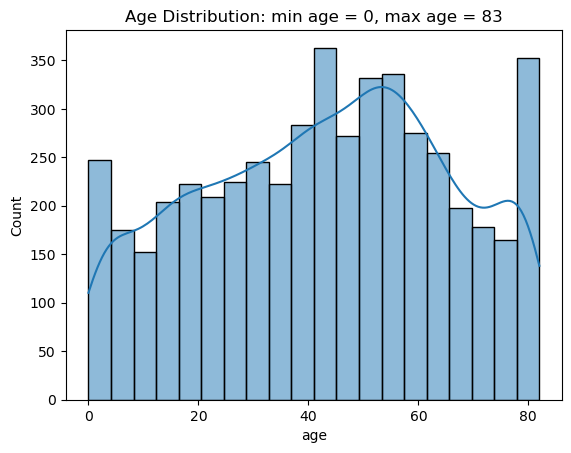

In [33]:
# Lets check the age distribution
sns.histplot(health_drop['age'], kde = True)
plt.title('Age Distribution: min age = 0, max age = 83')
plt.xlabel('age')

plt.show();

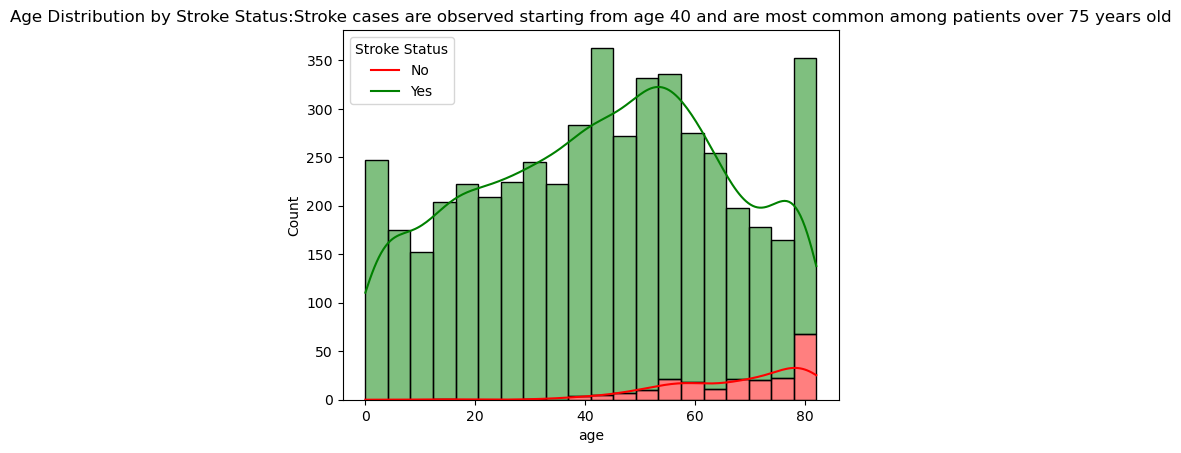

In [34]:
# Relationship between age and stroke
sns.histplot(health_drop, x = 'age',  hue='stroke', multiple='stack', palette=['green', 'red'], kde=True)
plt.title('Age Distribution by Stroke Status:Stroke cases are observed starting from age 40 and are most common among patients over 75 years old')
plt.legend(title='Stroke Status', labels=['No', 'Yes'])
plt.show();

In [35]:
# Create age groups
health_drop['age_group'] = pd.cut(health_drop['age'], bins=[0, 40, 60, 80, 100], labels=['<40', '40-60', '60-80', '80+'])
health_drop['age_group']

0       60-80
2       60-80
3       40-60
4       60-80
5         80+
        ...  
5104      <40
5106      80+
5107      <40
5108    40-60
5109    40-60
Name: age_group, Length: 4909, dtype: category
Categories (4, object): ['<40' < '40-60' < '60-80' < '80+']

In [36]:
# Calculate stroke rate by age group and gender
age_stroke_rate = health_drop.groupby('age_group')['stroke'].mean()
age_stroke_rate


age_group
<40      0.002801
40-60    0.037798
60-80    0.111615
80+      0.200000
Name: stroke, dtype: float64

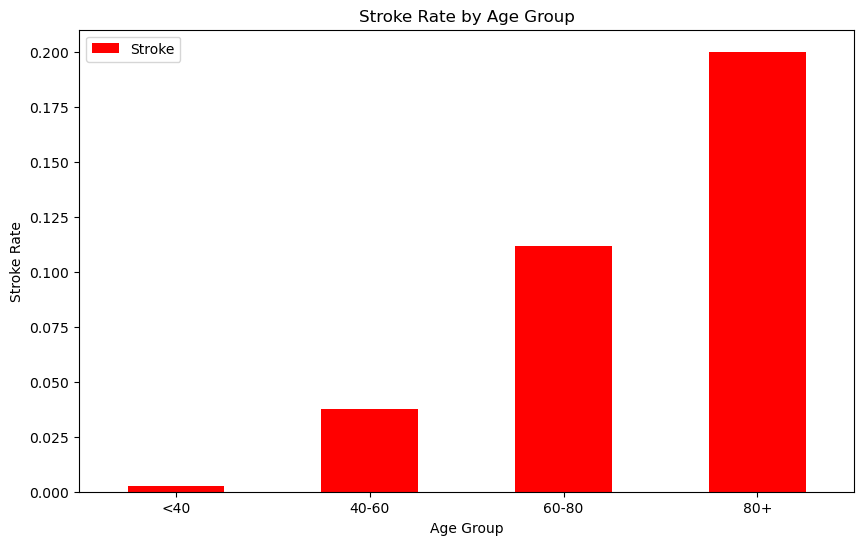

In [37]:
# Plot the stroke rate by age group and gender
plt.figure(figsize=(10, 6))
age_stroke_rate.plot(kind='bar', stacked=True, color = 'red')
plt.title('Stroke Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Stroke Rate')
plt.xticks(rotation=0)
plt.legend([ 'Stroke'])
plt.show();

 ### Conclusion: By analyzing age, gender, and stroke together
    
**1. Age is a significant risk factor, with the stroke rate increasing in older age groups**
    
**2. Gender show differences in stroke incidence, with males more likely to have stroke than female.**
    
**3. Age and Gender Combined shows that older males are at a higher risk of stroke than older females.**
   

#### <u>Question 4: What's the relationship between Hypertension and Stroke?</u>
**1. By examining the proportion of stroke cases by hypertension status, we observe a higher stroke rate among individuals with a history of 
hypertension or who have hypertension when compared to those without hypertension**

**2. A direct count of stroke cases also shows a similar trend, but it may not be as accurate, given that the dataset contains a larger number of people without hypertension.**

In [38]:
# Whats the relationship between age, hypertention, and stroke
health_drop['hypertension'].value_counts()

hypertension
No     4458
Yes     451
Name: count, dtype: int64

In [39]:
# Since there are more female individual in the dataset, we will calculate the stroke rate based on gender. 
stroke_rate_hypertension = health_drop.groupby('hypertension')['stroke'].mean()
stroke_rate_hypertension

hypertension
No     0.033423
Yes    0.133038
Name: stroke, dtype: float64

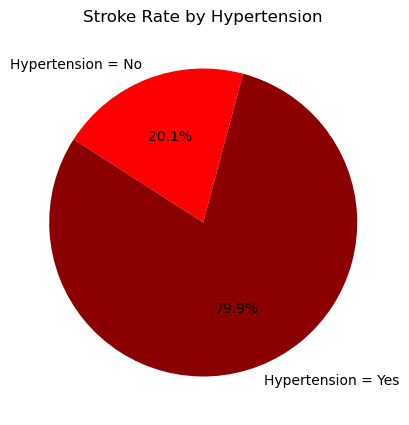

In [40]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(stroke_rate_hypertension, labels= ['Hypertension = No','Hypertension = Yes'],
        autopct='%1.1f%%', startangle=75, colors = ['#FF0000','#8B0000'], explode=[0,0.0])
plt.title('Stroke Rate by Hypertension')
plt.show();

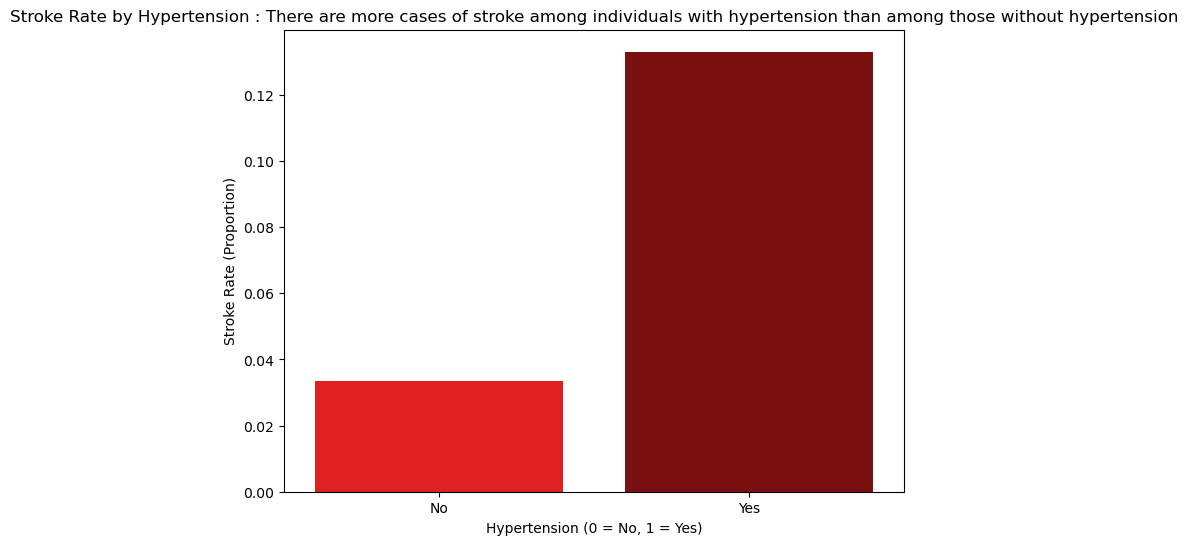

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_rate_hypertension.index, y=stroke_rate_hypertension.values, palette =['#FF0000','#8B0000'])
plt.title('Stroke Rate by Hypertension : There are more cases of stroke among individuals with hypertension than among those without hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Stroke Rate (Proportion)')
plt.show()

### <u>Can heart disease increase the rate of stroke?</u>
**1. Yes, by examining the proportion of stroke cases by heart disease, we observe a higher stroke rate among individuals with heart disease**

**2. A direct count of stroke cases per heart disease dont show a similar trend because the dataset contains a larger number individuals without heart disease.**

In [42]:
# count the number of stroke cases for male and female
health_drop['heart_disease'].value_counts()

heart_disease
0    4666
1     243
Name: count, dtype: int64

In [43]:
# Since there are more female individual in the dataset, we will calculate the stroke rate based on gender. 
stroke_rate_disease = health_drop.groupby('heart_disease')['stroke'].mean()
stroke_rate_disease

heart_disease
0    0.036219
1    0.164609
Name: stroke, dtype: float64

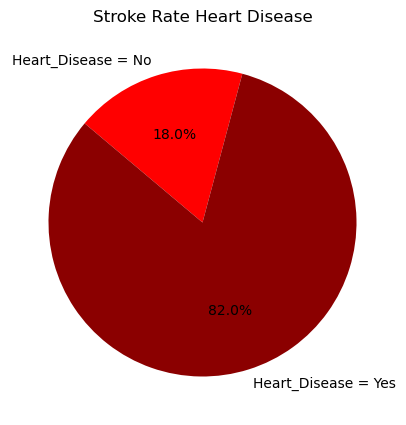

In [44]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(stroke_rate_disease, labels= ['Heart_Disease = No','Heart_Disease = Yes'], 
        autopct='%1.1f%%', startangle=75, colors = ['#FF0000','#8B0000'], explode=[0,0.0])
plt.title('Stroke Rate Heart Disease')
plt.show();

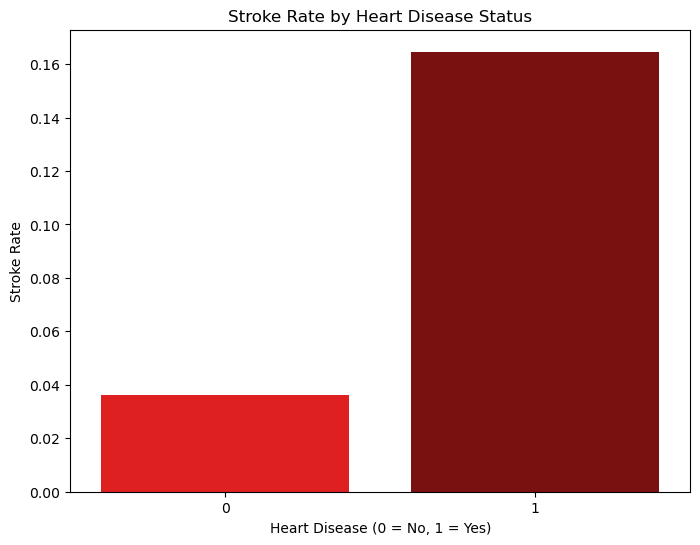

In [45]:
# Plot stroke rate by heart disease status
plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_rate_disease.index, y=stroke_rate_disease.values, palette =['#FF0000','#8B0000'])
plt.title('Stroke Rate by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Stroke Rate')
plt.show()

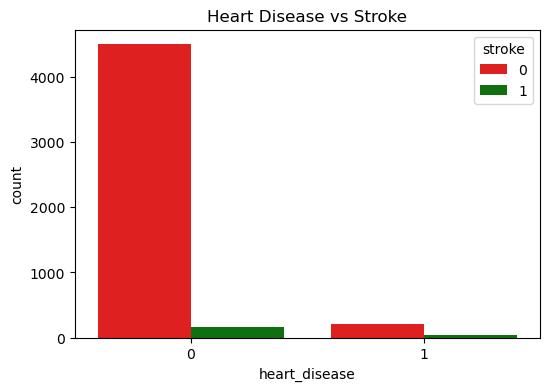

In [46]:
# Heart Disease vs Stroke
plt.figure(figsize=(6, 4))
sns.countplot(data= health_drop, x='heart_disease', palette = ['red', 'green'], hue = 'stroke')
plt.title("Heart Disease vs Stroke")
plt.show()

### <u>Can smoking increase the rate of stroke?<u/>
**1. Yes, by examining the proportion of stroke cases by smoking status, we observe that individuals who formerly smoked have the highest stroke rate, followed by those who currently smoke. In contrast, those who have never smoked have a lower risk of stroke compared to those who currently or formerly smoked**

**2. A direct count of stroke cases per smoke status dont show a similar trend because the dataset contains a larger number individuals who never smoked**

In [47]:
# lets check the count of smoking status from the raw dataset

health_drop['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [48]:
# Since there are more individuals who have never smoked in the dataset,
# we will calculate the stroke rate as an average across each smoking category to account for this imbalance 

stroke_rate_smoking = health_drop.groupby('smoking_status')['stroke'].mean()
stroke_rate_smoking

smoking_status
Unknown            0.019555
formerly smoked    0.068100
never smoked       0.045356
smokes             0.052917
Name: stroke, dtype: float64

In [49]:
smoking_status_data = {
    'smoking_status': ['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
    'stroke_rate': [0.019555, 0.068100, 0.045356, 0.052917]}
smoking_status_data

{'smoking_status': ['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
 'stroke_rate': [0.019555, 0.0681, 0.045356, 0.052917]}

In [50]:
# Create a DataFrame 
smoking_group = pd.DataFrame(smoking_status_data)
smoking_group

,smoking_status,stroke_rate
0,Unknown,0.019555
1,formerly smoked,0.068100
2,never smoked,0.045356
3,smokes,0.052917


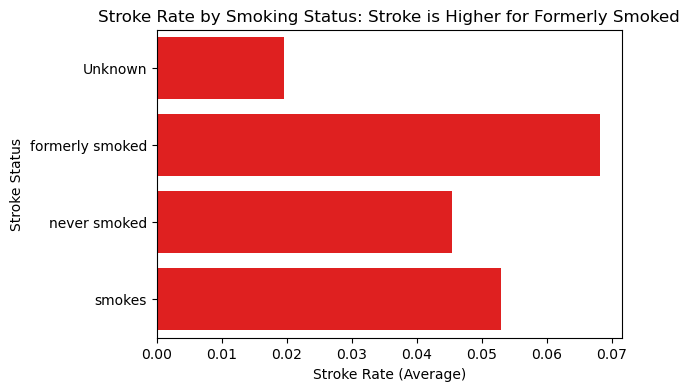

In [51]:
# Plotting the data
plt.figure(figsize=(6, 4))
sns.barplot(data=smoking_group, y='smoking_status', x='stroke_rate', color = 'red')
plt.title('Stroke Rate by Smoking Status: Stroke is Higher for Formerly Smoked')
plt.xlabel('Stroke Rate (Average)')
plt.ylabel('Stroke Status')
plt.show()


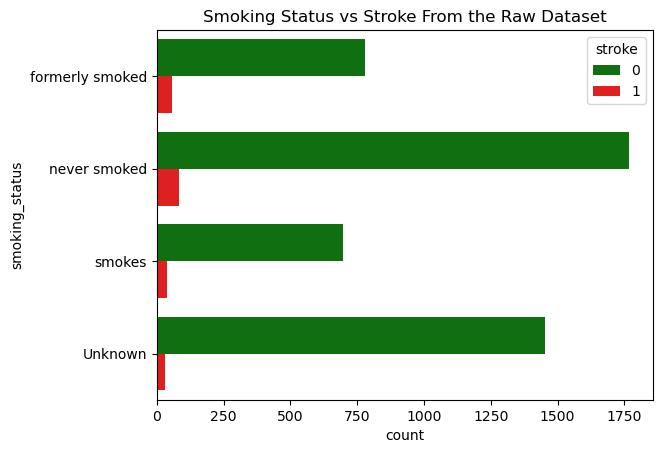

In [52]:
# A direct count of stroke cases per smoke status dont show a similar trend because the dataset contains a larger number of
# individuals without heart disease

sns.countplot(data= health_drop, y='smoking_status', palette = ['green', 'red'], hue='stroke')
plt.title("Smoking Status vs Stroke From the Raw Dataset")
plt.show()

### <u>Can Work Type affect the rate of stroke?<u/>
**1. Yes, by examining the proportion of stroke cases by work type, we observe that individuals who are self employed have highest stroke rate, followed by those who are in the public or private sector. In contrast, those who have never worked and children are at a lower risk**

**2. A direct count of stroke cases per work type dont show a similar trend because the dataset contains a larger number individuals work in the private sector.**

In [53]:
# lets check the count of work type from the raw dataset
health_drop['work_type'].value_counts()

work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

In [54]:
# Since there are more individuals who work in the private sector in the dataset,
# we will calculate the stroke rate as an average across each work type category to account for this imbalance 
 
stroke_rate_work = health_drop.groupby('work_type')['stroke'].mean()
stroke_rate_work

work_type
Govt_job         0.044444
Never_worked     0.000000
Private          0.045180
Self-employed    0.068387
children         0.001490
Name: stroke, dtype: float64

In [55]:
work_type = {
    'work_type': ['Govt_job', 'Never_worked', 'Private', 'Self-employed ','children'],
    'stroke_rate': [0.050228, 0.000000, 0.050940, 0.079365,0.002911 ]}
work_type

{'work_type': ['Govt_job',
  'Never_worked',
  'Private',
  'Self-employed ',
  'children'],
 'stroke_rate': [0.050228, 0.0, 0.05094, 0.079365, 0.002911]}

In [56]:
#Create a Date Frame
stroke_work = pd.DataFrame(work_type)
stroke_work

,work_type,stroke_rate
0,Govt_job,0.050228
1,Never_worked,0.000000
2,Private,0.050940
3,Self-employed,0.079365
4,children,0.002911


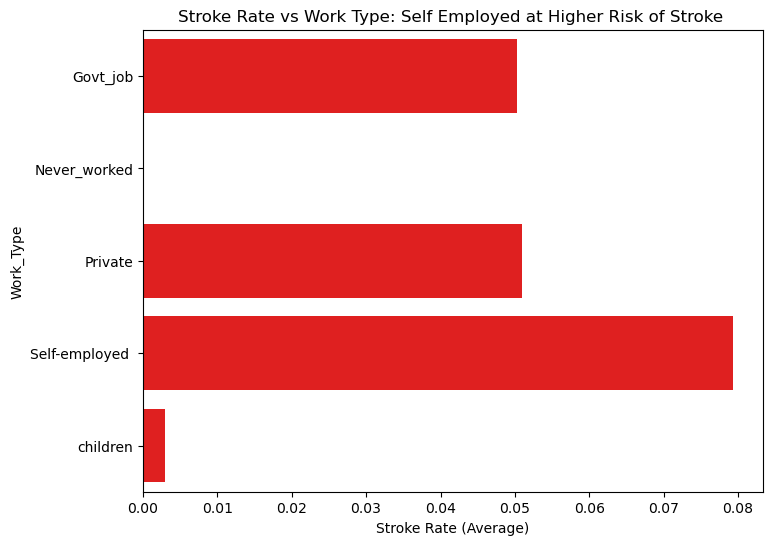

In [57]:
# Plotting the data
plt.figure(figsize=(8, 6))
sns.barplot(data= stroke_work, y='work_type', x='stroke_rate', color = 'red')
plt.title('Stroke Rate vs Work Type: Self Employed at Higher Risk of Stroke ')
plt.xlabel('Stroke Rate (Average)')
plt.ylabel('Work_Type')
plt.show()

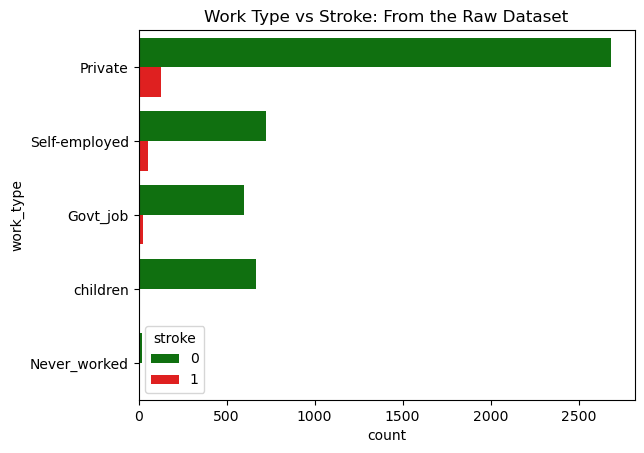

In [58]:
# A direct count of stroke cases per work type dont show a similar trend because the dataset contains a larger number of
# individuals in the private sector

sns.countplot(data= health_drop, y='work_type', palette = ['green', 'red'], hue='stroke')
plt.title("Work Type vs Stroke: From the Raw Dataset")
plt.show()

### <u>Can Individua Residence affect the rate of stroke?<u/>
**1. Note really, by examining the proportion of stroke cases by residence type, we observe that individuals in Urban areas have a slightly 3% percent higher risk of stroke than in Rural areas**

In [59]:
# lets check the count of residence type from the raw dataset
health_drop['Residence_type'].value_counts()

Residence_type
Urban    2490
Rural    2419
Name: count, dtype: int64

In [60]:
# Since there are more individuals who live in the urban areas in the dataset,
# we will calculate the stroke rate as an average across each Residence_type to account for this imbalance 
 
stroke_rate_residence = health_drop.groupby('Residence_type')['stroke'].mean()
stroke_rate_residence

Residence_type
Rural    0.041339
Urban    0.043775
Name: stroke, dtype: float64

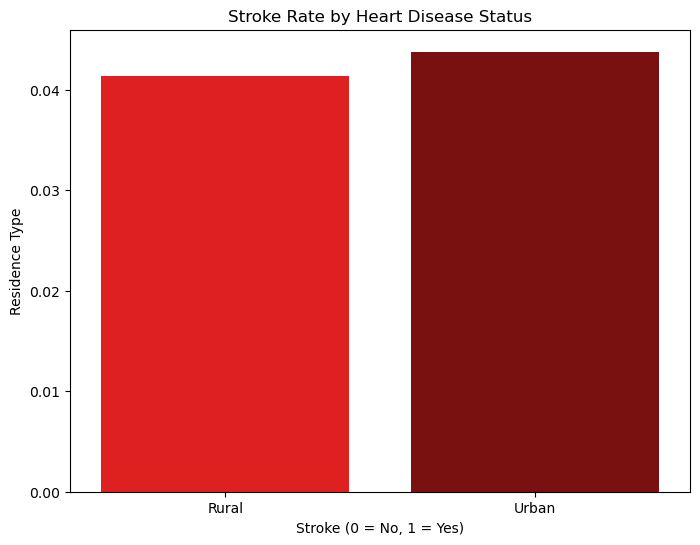

In [61]:
# Plot stroke rate by heart disease status
plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_rate_residence.index, y=stroke_rate_residence.values,palette =['#FF0000','#8B0000'])
plt.title('Stroke Rate by Heart Disease Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Residence Type')
plt.show()

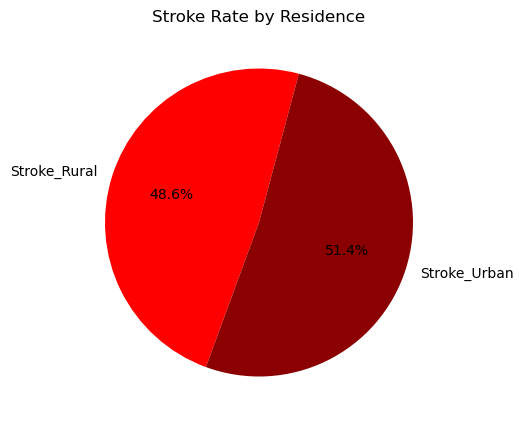

In [62]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(stroke_rate_residence, labels= ['Stroke_Rural', 'Stroke_Urban'], 
        autopct='%1.1f%%', startangle=75, colors = ['#FF0000','#8B0000'], explode=[0, 0.0])
plt.title('Stroke Rate by Residence')
plt.show();

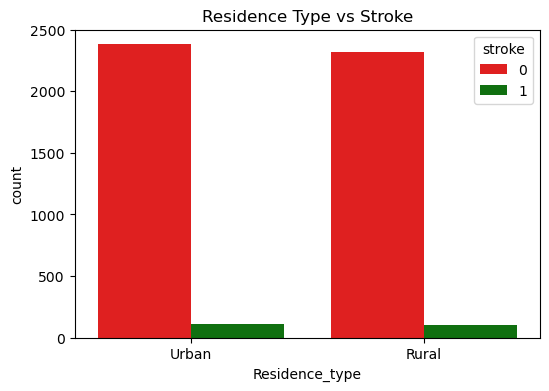

In [63]:
# Heart Disease vs Stroke
plt.figure(figsize=(6, 4))
sns.countplot(data= health_drop, x='Residence_type', palette = ['red', 'green'], hue = 'stroke')
plt.title("Residence Type vs Stroke")
plt.show()

### <u>Can Glucose Level affect the rate of stroke?<u/>

**Yes, high glucose level increase the risk of stroke especially among older age group**

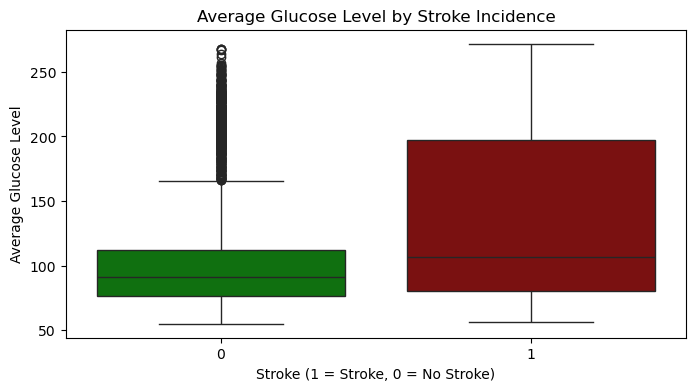

In [64]:
# plot a box plot to show relationship between stroke and average glucose level
plt.figure(figsize=(8, 4))
sns.boxplot(x='stroke', y='avg_glucose_level', data=health_drop, palette=['green','#8B0000'])
plt.title("Average Glucose Level by Stroke Incidence")
plt.xlabel("Stroke (1 = Stroke, 0 = No Stroke)")
plt.ylabel("Average Glucose Level")
plt.show()

### <u>Can age and average glucose level affect rate of stroke?<u/>
**Individuals within age group 44-80 years who have high glucose level are at a higher risk of stroke**

In [65]:
mean_glucose = health_drop['avg_glucose_level'].mean()
mean_glucose

105.3051497249949

In [66]:
mean_age = health_drop['age'].mean()
mean_age

42.85414544713791

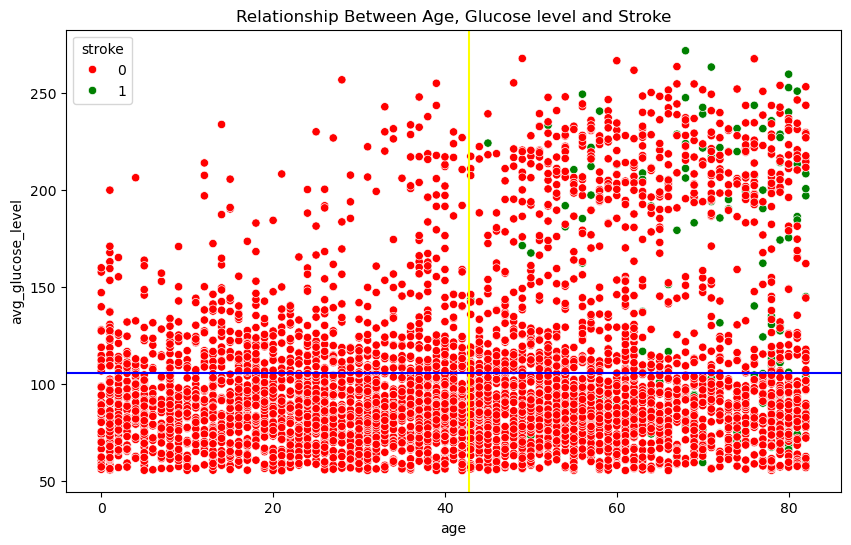

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='avg_glucose_level', palette = ['red','green'], hue = 'stroke', data=health_drop)
plt.axvline(mean_age, color='yellow', linestyle='-', label=f'Mean Age: {mean_age:.2f}')
plt.axhline(mean_glucose, color='blue', linestyle='-', label=f'Mean Glucose: {mean_glucose:.2f}')
plt.title('Relationship Between Age, Glucose level and Stroke')
plt.show()


### <u>Can age bmi affect rate of stroke?<u/>
**There is no significant difference between the number of stroke incidence in for indidviduals with the same bmi, therefore bmi dont necerally affect stroke incidence**

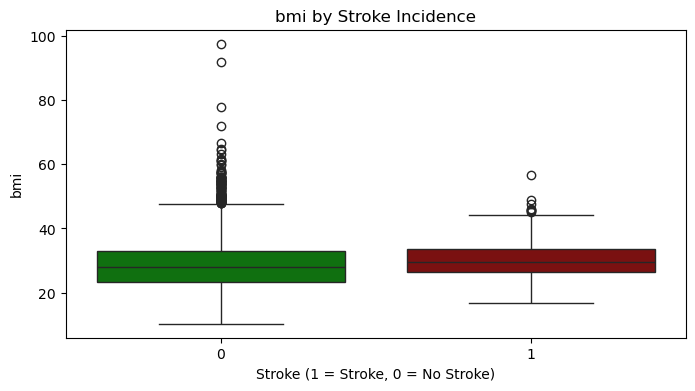

In [68]:
# plot a box plot to show relationship between stroke and bmi
plt.figure(figsize=(8, 4))
sns.boxplot(x='stroke', y='bmi', data=health_drop, palette=['green','#8B0000'])
plt.title("bmi by Stroke Incidence")
plt.xlabel("Stroke (1 = Stroke, 0 = No Stroke)")
plt.ylabel("bmi")
plt.show()

### <u>Can age and bmi affect rate of stroke?<u/>
**Individuals within age group 42-80 years who have either low, average or high bmi are almost at the same risk of stroke**

In [69]:
mean_bmi = health_drop['bmi'].mean()
mean_bmi

28.893236911794663

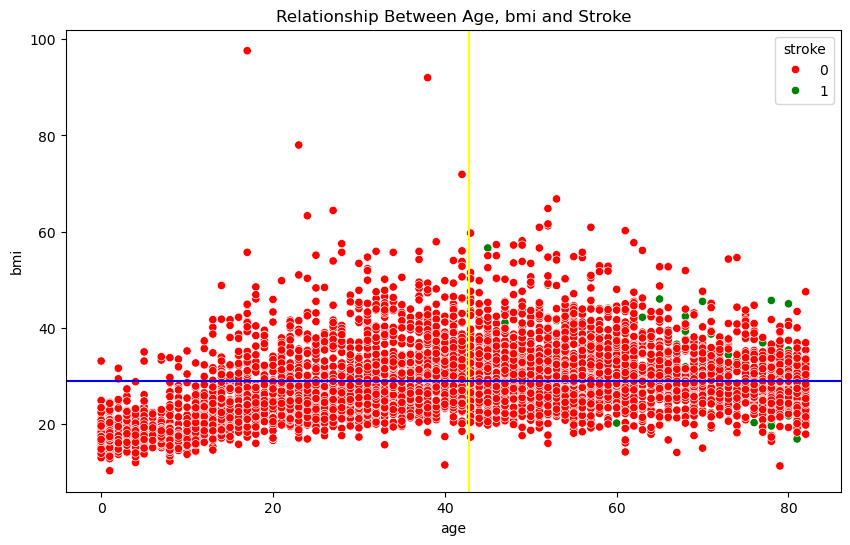

In [70]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', palette = ['red','green'], hue = 'stroke', data=health_drop)
plt.axvline(mean_age, color='yellow', linestyle='-', label=f'Mean age: {mean_age:.2f}')
plt.axhline(mean_bmi, color='blue', linestyle='-', label=f'Mean bmi: {mean_bmi:.2f}')
plt.title('Relationship Between Age, bmi and Stroke')
plt.show()

### <u>Whats Next?<u/>
**1. Statistical Test**

**2. Correlation Analysis or Logistic Regression**

*PLEASE CHECK THE NEXT PAGE*

**Maxwell Adigwe Project**

In [71]:
health_drop.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67,No,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60-80
2,31112,Male,80,No,1,Yes,Private,Rural,105.92,32.5,never smoked,1,60-80
3,60182,Female,49,No,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-60
4,1665,Female,79,Yes,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60-80
5,56669,Male,81,No,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,80+


In [72]:
health.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [73]:
health_drop              

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67,No,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60-80
2,31112,Male,80,No,1,Yes,Private,Rural,105.92,32.5,never smoked,1,60-80
3,60182,Female,49,No,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-60
4,1665,Female,79,Yes,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60-80
5,56669,Male,81,No,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,80+
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13,No,0,No,children,Rural,103.08,18.6,Unknown,0,<40
5106,44873,Female,81,No,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,80+
5107,19723,Female,35,No,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,<40
5108,37544,Male,51,No,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,40-60


In [74]:
health_drop.describe()

,id,age,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.854145,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.575986,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,271.740000,97.600000,1.000000


In [75]:
health_data = pd.read_csv(r"C:\Users\USER\Downloads\archive (18)\healthcare-dataset-stroke-data.csv")
health_data.head
health_data.drop(columns = ['id'])
health_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [76]:
health_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [77]:
health_data.dropna(inplace=True)

In [78]:
health_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [79]:
health_data = health_data.drop(columns = ['id'], axis = 0)
health_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [80]:
health_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [81]:
health_data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [82]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [83]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# Apply label encoding to each categorical column
for col in categorical_cols:
    health_data[col] = label_encoder.fit_transform(health_data[col])

In [84]:
health_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X = health_data.drop(columns=['stroke'])
y = health_data['stroke'] 

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 101)

In [88]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1147,1,37.0,0,0,1,2,0,78.42,29.9,2
1414,1,78.0,0,1,1,3,1,228.70,34.0,0
2723,0,31.0,0,0,0,2,1,89.11,51.9,3
370,1,44.0,0,0,1,2,0,74.91,37.5,2
86,1,61.0,0,1,1,2,0,111.81,27.3,3
...,...,...,...,...,...,...,...,...,...,...
4260,1,64.0,0,0,1,2,1,62.21,28.3,0
4354,0,34.0,0,0,0,2,0,94.37,38.1,2
645,1,53.0,0,0,1,3,1,76.36,29.8,0
1435,0,54.0,0,1,1,2,1,140.28,37.1,1


In [89]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3231,0,57.0,0,0,1,0,1,104.36,19.2,3
4404,1,73.0,0,0,1,2,1,101.58,35.9,2
3853,0,47.0,0,0,1,3,0,157.77,28.4,2
2318,0,51.0,1,0,1,2,1,173.96,31.2,1
3995,1,45.0,0,0,1,2,0,95.62,29.5,3
...,...,...,...,...,...,...,...,...,...,...
4842,1,1.8,0,0,0,4,1,153.31,17.1,0
3497,0,37.0,0,0,1,2,1,100.22,22.7,3
2740,1,15.0,0,0,0,1,0,79.59,28.4,0
3494,0,66.0,0,0,1,2,1,112.77,22.7,3


In [90]:
y_train

1147    0
1414    0
2723    0
370     0
86      1
       ..
4260    0
4354    0
645     0
1435    0
1630    0
Name: stroke, Length: 3927, dtype: int64

In [91]:
y_test

3231    0
4404    0
3853    0
2318    0
3995    0
       ..
4842    0
3497    0
2740    0
3494    0
3583    0
Name: stroke, Length: 982, dtype: int64

## Normalize the data

In [92]:
health_data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,42.865374,0.091872,0.049501,0.652679,2.170096,0.507232,105.305150,28.893237,1.375433,0.042575
std,0.492309,22.555115,0.288875,0.216934,0.476167,1.092593,0.499999,44.424341,7.854067,1.067322,0.201917
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.070000,23.500000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.680000,28.100000,2.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.570000,33.100000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [134]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [135]:
X_train_std = std.fit_transform(X_train)

In [136]:
X_test_std= std.transform( X_test)

In [137]:
X_train_std

array([[ 1.2059758 , -0.25853712, -0.3196265 , ..., -0.59896361,
         0.12508024,  0.57593339],
       [ 1.2059758 ,  1.57036655, -0.3196265 , ...,  2.78626161,
         0.64495206, -1.30176724],
       [-0.82745785, -0.52618156, -0.3196265 , ..., -0.35815939,
         2.91463634,  1.5147837 ],
       ...,
       [ 1.2059758 ,  0.45518138, -0.3196265 , ..., -0.64536741,
         0.11240044, -1.30176724],
       [-0.82745785,  0.49978879, -0.3196265 , ...,  0.79450214,
         1.03802587, -0.36291693],
       [-0.82745785,  1.70418877, -0.3196265 , ...,  0.22233871,
        -1.34577661, -0.36291693]])

In [133]:
X_test_std

array([[-0.82745785,  0.63361101, -0.3196265 , ..., -0.01463607,
        -1.2316584 ,  1.5147837 ],
       [ 1.2059758 ,  1.34732952, -0.3196265 , ..., -0.07725868,
         0.88586827,  0.57593339],
       [-0.82745785,  0.18753694, -0.3196265 , ...,  1.18848397,
        -0.06511676,  0.57593339],
       ...,
       [ 1.2059758 , -1.23990007, -0.3196265 , ..., -0.57260805,
        -0.06511676, -1.30176724],
       [-0.82745785,  1.03507767, -0.3196265 , ...,  0.17480859,
        -0.78786539,  1.5147837 ],
       [-0.82745785,  0.32135916, -0.3196265 , ..., -0.79043562,
        -1.29505741, -0.36291693]])

### Train the Model

In [146]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [147]:
dt.fit(X_train.std, y_train)

DecisionTreeClassifier()

In [149]:
dt.feature_importances_

array([0.01699864, 0.17777852, 0.01732261, 0.02352137, 0.01610297,
       0.03863478, 0.05176764, 0.309098  , 0.26265766, 0.08611779])

In [100]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [150]:
dt.predict(X_test_std)

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [153]:
y_pred = dt.predict(X_test_std)

In [141]:
from sklearn.metrics import accuracy_score

In [154]:
accuracy_score(y_test, y_pred)

0.9032586558044806

In [157]:
ac_dt = accuracy_score(y_test, y_pred)
ac_dt 

0.9032586558044806

### Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [159]:
lr = LogisticRegression()

In [165]:
lr.fit(X_train.std, y_train)

LogisticRegression()

In [177]:
lr.predict(X_test_std)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [178]:
y_pred = lr.predict(X_test_std)

In [179]:
 accuracy_score(y_test, y_pred)

0.9470468431771895

In [180]:
ac_lr =accuracy_score(y_test, y_pred)

In [181]:
ac_lr

0.9470468431771895

### K Nearest Neighbour

In [182]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier()

In [184]:
knn.fit(X_train.std, y_train)

KNeighborsClassifier()

In [185]:
knn.predict(X_test_std)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [186]:
y_pred = knn.predict(X_test_std)

In [187]:
accuracy_score(y_test, y_pred)

0.9429735234215886

In [188]:
ac_knn = accuracy_score(y_test, y_pred)

In [189]:
ac_knn 

0.9429735234215886

In [190]:
ac_lr

0.9470468431771895

### RandomForest

In [191]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [192]:
rf.fit(X_train.std, y_train)

RandomForestClassifier()

In [193]:
rf.predict(X_test_std)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [194]:
y_pred = rf.predict(X_test_std)

In [195]:
.predict(X_test_std)

0.9470468431771895

In [196]:
ac_rf = accuracy_score(y_test, y_pred)

In [197]:
ac_rf

0.9470468431771895

### SVM

In [198]:
from sklearn.svm import SVC

In [199]:
svm_best = SVC()
svm_best.fit(X_train_std, y_train)

SVC()

In [200]:
svm_best.predict(X_test_std)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [203]:
y_pred = svm_best.predict(X_test_std)

In [204]:
accuracy_score(y_test, y_pred)

0.9470468431771895

In [205]:
svm_ac = accuracy_score(y_test, y_pred)

In [206]:
svm_ac 

0.9470468431771895

### Plot the models

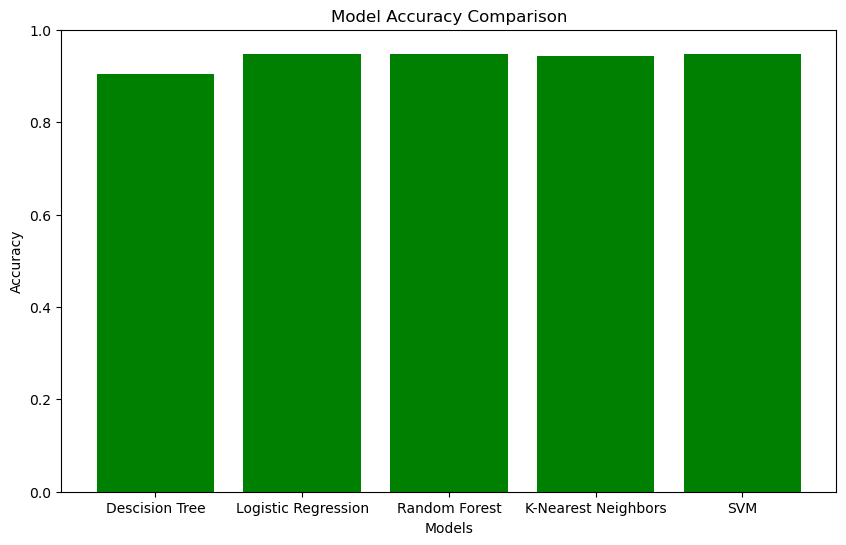

In [215]:
models =['Descision Tree','Logistic Regression','Random Forest','K-Nearest Neighbors', 'SVM']
accuracies =[ac_dt,ac_lr,ac_rf,ac_knn,svm_ac]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='green')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show();

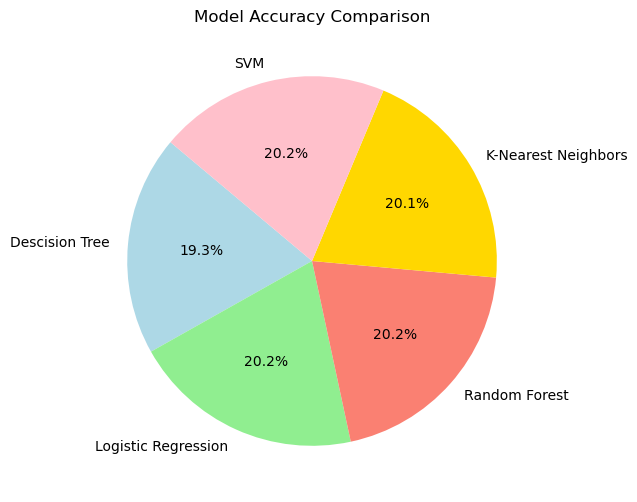

In [216]:
plt.figure(figsize=(6, 6))
plt.pie(accuracies, labels=models, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'salmon', 'gold', 'pink'])
plt.title('Model Accuracy Comparison')
plt.show()

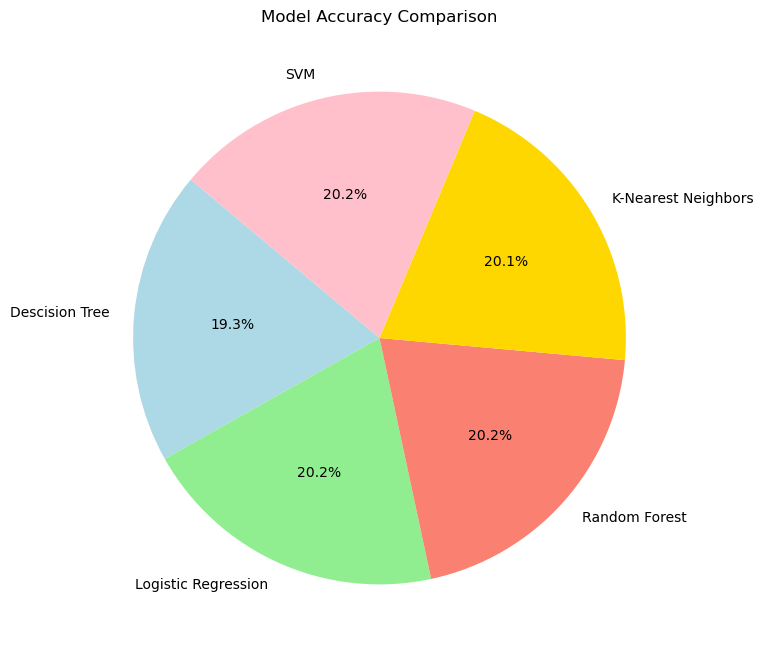

In [218]:
import pickle
with open('model_accuracies.pkl', 'wb') as file:
    pickle.dump((models, accuracies), file)

plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=models, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'salmon', 'gold', 'pink'])
plt.title('Model Accuracy Comparison')
plt.show()